In [1]:
! pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install pandas
! pip install tensorflow
! pip install matplotlib
! pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%load_ext tensorboard

In [12]:
from sklearn.manifold import TSNE

In [5]:
train = pd.read_csv('data/train.csv')
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(42000, 785)

In [6]:
test = pd.read_csv('data/test.csv')
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(28000, 784)

In [10]:
x = train.iloc[:, 1:785]
y = train.iloc[:, 0]

x_test = test.iloc[:, 0:784]

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [13]:
x_tsn = x/255

tsne = TSNE()
tsne_res = tsne.fit_transform(x_tsn)

In [14]:
print(tsne_res)

[[-45.72564    29.796183 ]
 [ 82.34311    12.7808895]
 [-98.49303    12.3989525]
 ...
 [-72.98128   -41.80632  ]
 [ 65.71426   -42.029533 ]
 [-11.941011  -65.694756 ]]


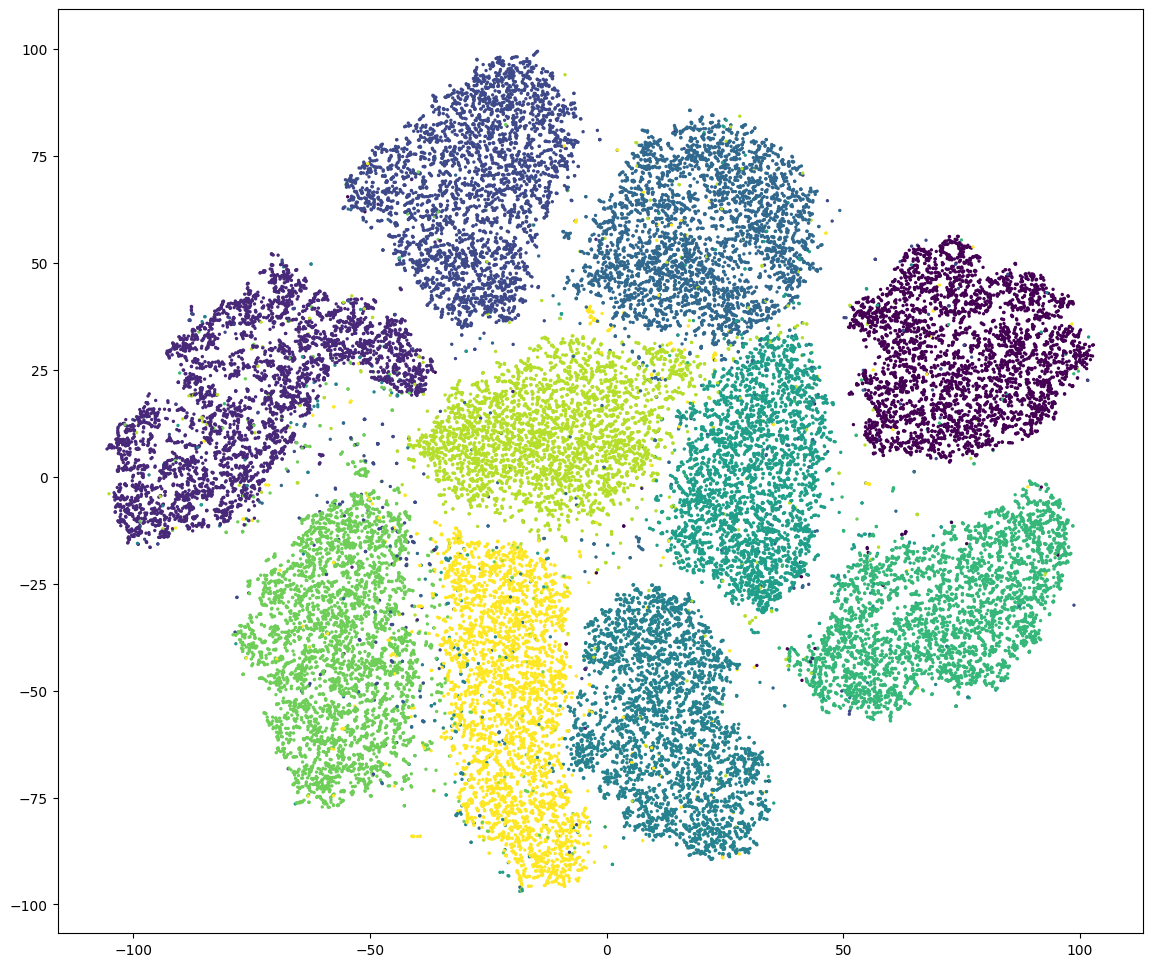

In [16]:
plt.figure(figsize=(14,12))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y, s = 2)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.2, random_state = 1212)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


In [21]:
x_train_reshape = x_train.to_numpy().reshape(33600, 28,28)
y_train_reshape = y_train.values
x_validation_reshape = x_validation.to_numpy().reshape(8400, 28,28)
y_validation_reshape = y_validation.values

x_test_reshape = test.to_numpy().reshape(28000, 28,28)

In [22]:
print(x_train_reshape.shape)
print(y_train_reshape.shape)
print(x_validation_reshape.shape)
print(y_validation_reshape.shape)

(33600, 28, 28)
(33600,)
(8400, 28, 28)
(8400,)


In [24]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_reshape.shape
IMAGE_CHANNELS = 1

print(IMAGE_WIDTH)
print(IMAGE_HEIGHT)
print(IMAGE_CHANNELS)

28
28
1


In [25]:
pd.DataFrame(x_train_reshape[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


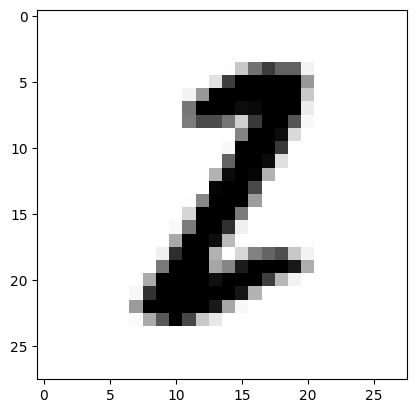

In [26]:
plt.imshow(x_train_reshape[0], cmap=plt.cm.binary)
plt.show()